# Dealing with inbalanced Dataset

We have a dataset in realisitc proportion, we could oversemple but it will not be good.

We have a lot of IBD events created by Andrea and also a lot of radioactivity events. If we sort them in temporal order we get that there will be a little amount of IBD in all the radioactivity events, because it is more frequently have radioactivity events respect of IBD that are rare. 

So in order to train our ML-algorithm we could use generated IBD events and generated Radioactivity events, so in that cse we have basically the same amount of data and the inbalanced problem will disappear. After the training, we test with inbalaced dataset.

Basically we use a smote 

We will se if it works...

# Loading data

In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [3]:
all_feature = pd.read_csv("../../../../mnt/fcufino/all_features.csv")

## Checking the dataset size

(array([1000081., 1468385.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

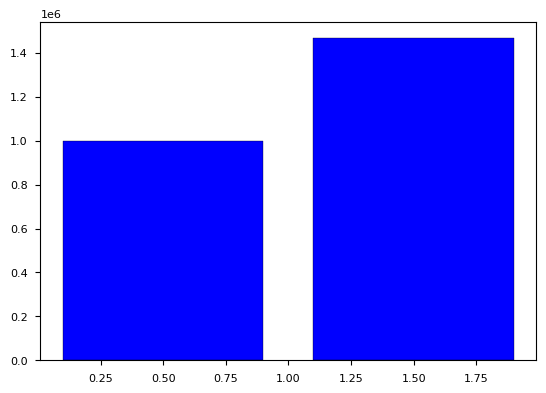

In [4]:
#plot a hist that counts the IBD and BKG
plt.hist(all_feature['Label'], bins = 2, range = (0,2), histtype = 'bar', rwidth = 0.8, color = 'b', label = 'BKG')




# Balancing the dataset

In [5]:
print("BKG: ", all_feature["delta_time"][all_feature['Label']==0].shape[0])
print("IBD: ", all_feature["delta_time"][all_feature['Label']==1].shape[0]) 

BKG:  1000081
IBD:  1468385


Sotto per mostrare che nel dataset BKG ci sono anche IBD non correlati

In [6]:
print(all_feature['Source'][all_feature["Label"]==0].unique())

[0. 1.]


In [7]:
for key in all_feature.keys():
    print(key)
print(all_feature.keys())

E_pro
delta_radius
Label
E_del
R_delayed
delta_time
R_prompt
Source
Index(['E_pro', 'delta_radius', 'Label', 'E_del', 'R_delayed', 'delta_time',
       'R_prompt', 'Source'],
      dtype='object')


In [8]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature["delta_time"][all_feature['Label']==1].shape[0]
num_BKG = all_feature["delta_time"][all_feature['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature.shape[0] - del_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", num_BKG - del_BKG) 
print("IBD:", num_IBD - del_IBD)

BKG: 1000081
IBD: 1000081


# Plots

In [9]:
print(np.logical_and(all_feature["E_pro"] > 100 , True).sum())
print(np.logical_and(all_feature["E_del"] > 100 , True).sum())

64
68


In [10]:
all_feature.describe()

,E_pro,delta_radius,Label,E_del,R_delayed,delta_time,R_prompt,Source
count,2.000162e+06,2.000162e+06,2000162.0,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06
mean,2.142118e+00,1.059980e+04,0.5,1.534151e+00,1.424177e+04,3.807990e+05,1.424987e+04,5.033117e-01
std,2.157978e+00,1.147984e+04,0.5,1.647265e+00,3.496881e+03,3.145566e+05,3.486147e+03,4.999892e-01
min,0.000000e+00,6.084932e-01,0.0,0.000000e+00,0.000000e+00,6.400000e+02,3.947012e-06,0.000000e+00
25%,5.691091e-01,3.316806e+02,0.0,5.678132e-01,1.220154e+04,1.106400e+05,1.220738e+04,0.000000e+00
50%,1.796610e+00,2.045694e+03,0.5,2.131900e+00,1.531965e+04,2.887090e+05,1.532872e+04,1.000000e+00
75%,3.291638e+00,2.113910e+04,1.0,2.219660e+00,1.739900e+04,6.109250e+05,1.739900e+04,1.000000e+00
max,3.913881e+02,3.479771e+04,1.0,3.913881e+02,1.740007e+04,1.099999e+06,1.740007e+04,1.000000e+00


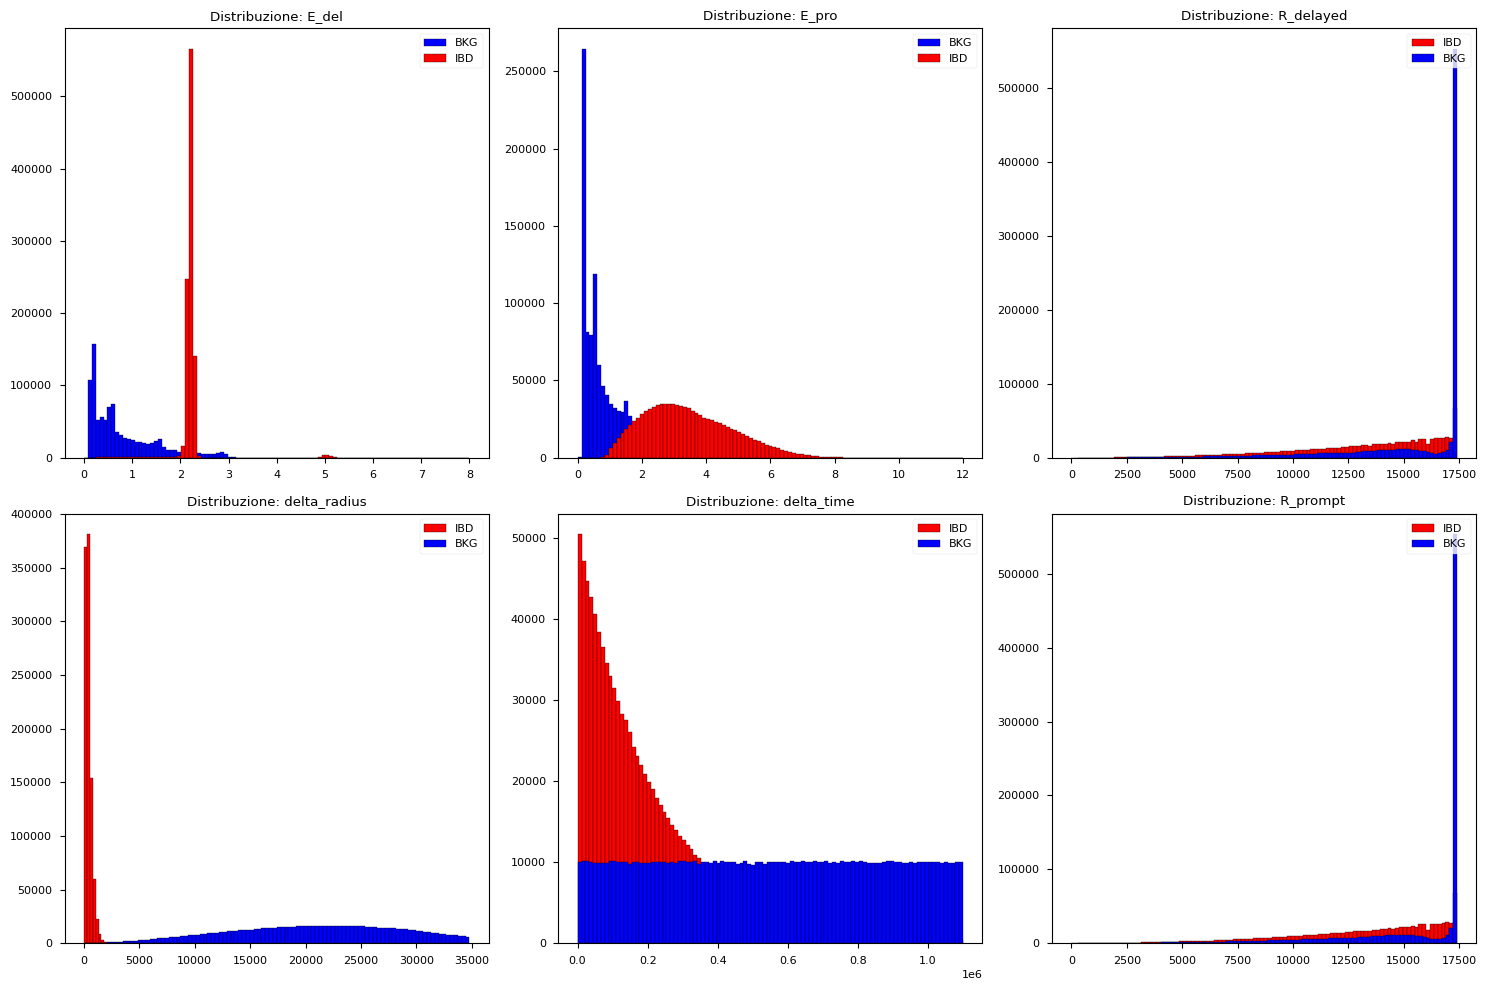

In [11]:
features = ['E_del',"E_pro","R_delayed","delta_radius","delta_time","R_prompt"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,100), color='blue', label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,100), color='red', label='IBD')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,100), color='blue', label='BKG')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,100), color='red', label='IBD')
    else:
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='red', label='IBD')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],bins=100, color='blue', label='BKG')
    

 
    ax.set_title(f'Distribuzione: {feature}')
    ax.legend(loc='upper right')
    

plt.tight_layout()
plt.show()

# ML Classification Algorithms

In [12]:
print(all_feature['delta_time'].shape)
print(all_feature['delta_time'].shape)
print(all_feature['E_del'].shape)
print(all_feature['E_pro'].shape)
print(all_feature['R_delayed'].shape)
print(all_feature['R_prompt'].shape)
print(all_feature['delta_radius'].shape)

(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)


## XGBClassifier

In [13]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source']


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

print(X)

            E_pro  delta_radius     E_del     R_delayed  delta_time   
2468465  0.358233  27854.822266  1.312886  17399.000000    867009.0  \
1921065  0.952731  31204.800781  0.160397  14135.662109    467018.0   
1921067  1.151861  23769.873047  0.139023  17399.000000    964901.0   
920889   0.149825  29357.908203  0.290587  17399.001953    678083.0   
920885   0.794729  16523.945312  0.569797  13986.085938    946270.0   
...           ...           ...       ...           ...         ...   
245718   3.237550    196.186667  2.154730  16888.598081    424608.0   
245735   2.335610    344.730660  2.186510  12599.249566      3952.0   
245715   3.993240    171.911541  2.141640  15525.960179      8368.0   
245713   3.496410    614.830822  0.348911  17399.956731    171072.0   
245712   1.336900    355.466640  5.079430  15346.321652    314624.0   

             R_prompt  
2468465  11569.711914  
1921065  17399.000000  
1921067  17399.000000  
920889   13262.629883  
920885   17257.529297  
...

In [14]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb


scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()
#Using default parameters and train
model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=250, max_depth=5, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)


# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


/home/fcufino/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.00030	validation_0-logloss:0.64445	validation_1-error:0.00035	validation_1-logloss:0.64446
[1]	validation_0-error:0.00029	validation_0-logloss:0.60039	validation_1-error:0.00035	validation_1-logloss:0.60040
[2]	validation_0-error:0.00029	validation_0-logloss:0.56032	validation_1-error:0.00035	validation_1-logloss:0.56034
[3]	validation_0-error:0.00028	validation_0-logloss:0.52375	validation_1-error:0.00036	validation_1-logloss:0.52378
[4]	validation_0-error:0.00029	validation_0-logloss:0.49024	validation_1-error:0.00037	validation_1-logloss:0.49027
[5]	validation_0-error:0.00028	validation_0-logloss:0.45945	validation_1-error:0.00035	validation_1-logloss:0.45948
[6]	validation_0-error:0.00028	validation_0-logloss:0.43106	validation_1-error:0.00035	validation_1-logloss:0.43110
[7]	validation_0-error:0.00028	validation_0-logloss:0.40483	validation_1-error:0.00035	validation_1-logloss:0.40488
[8]	validation_0-error:0.00028	validation_0-logloss:0.38055	validation_1

Saving Model

In [15]:
#load the model

model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=250, max_depth=5, learning_rate = 0.05)
model.load_model("xgboost.model")


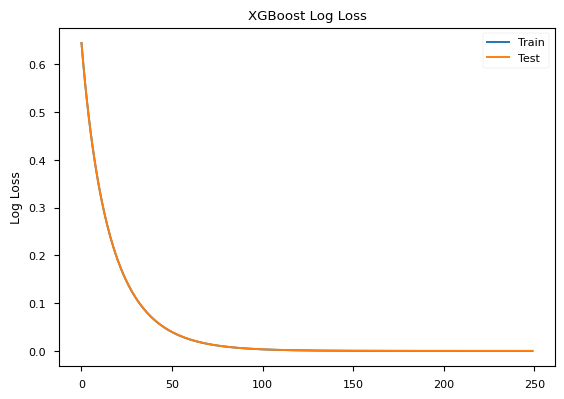

In [16]:
# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


In [17]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199923
         1.0       1.00      1.00      1.00    200110

    accuracy                           1.00    400033
   macro avg       1.00      1.00      1.00    400033
weighted avg       1.00      1.00      1.00    400033



array([[199909,     14],
       [     8, 200102]])

In [18]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['E_pro', 'delta_radius', 'E_del', 'R_delayed', 'delta_time', 'R_prompt', 'Source']


### Shap Interpretability

/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/fcufino/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max

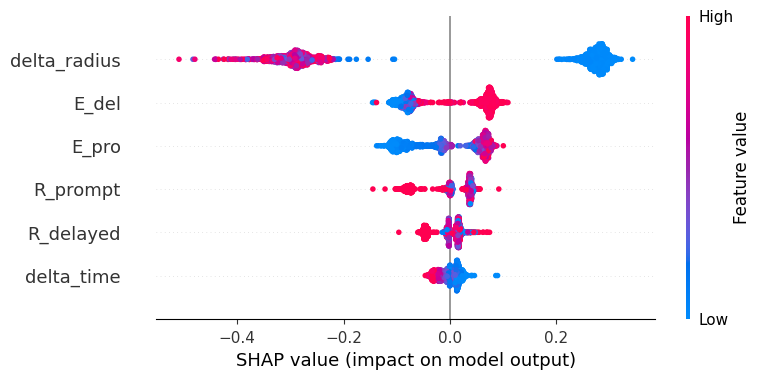

In [19]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names)

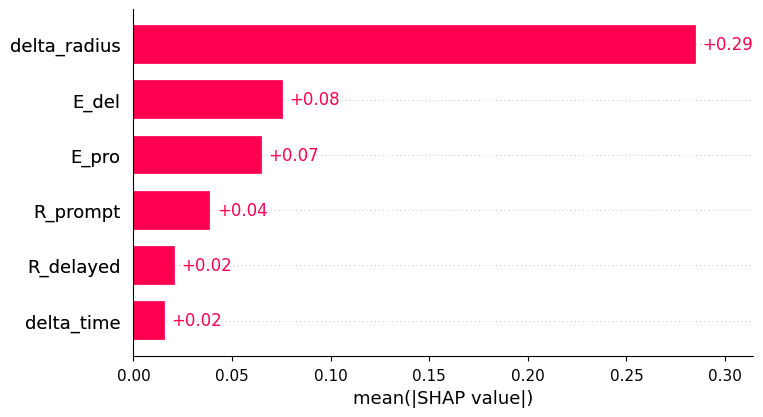

In [20]:
# Importnce plot
shap.plots.bar(shap_values)

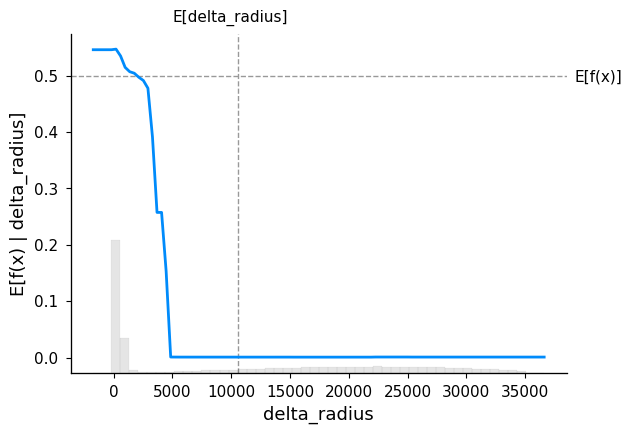

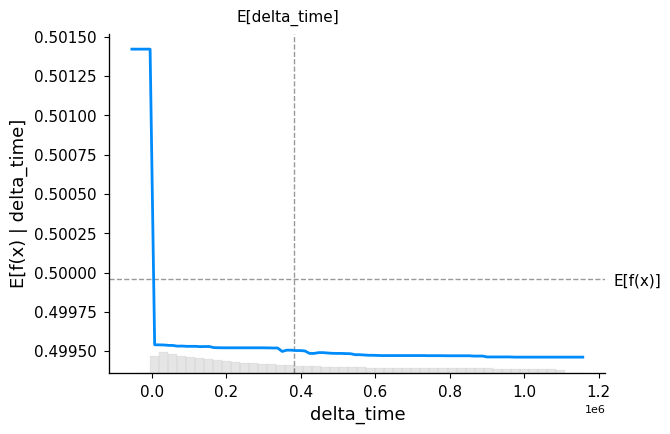

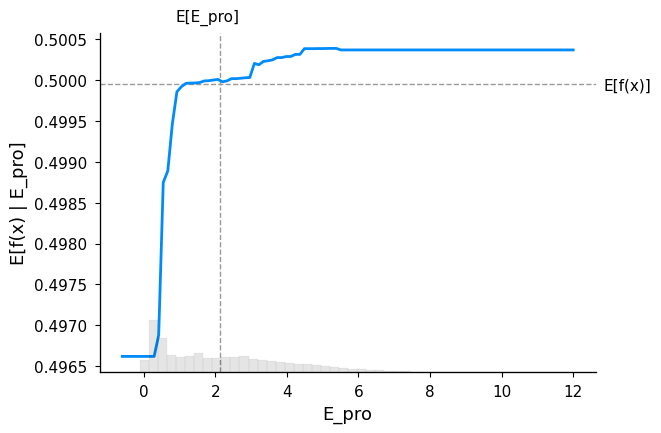

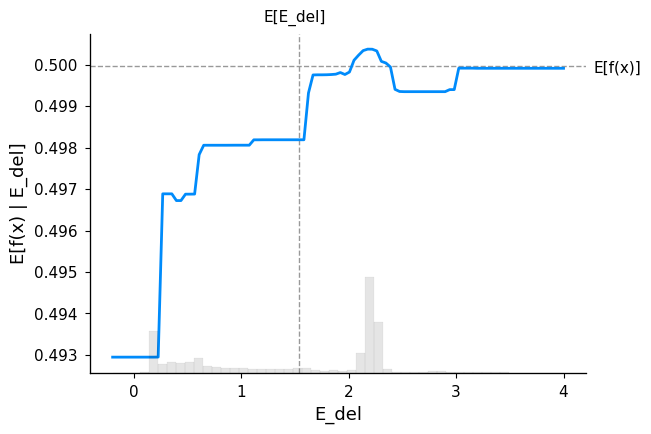

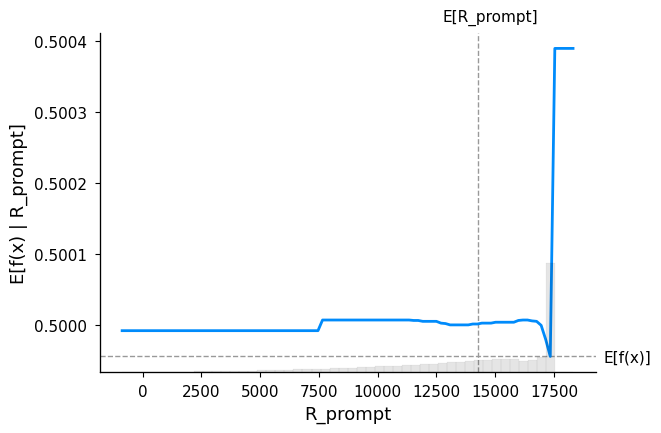

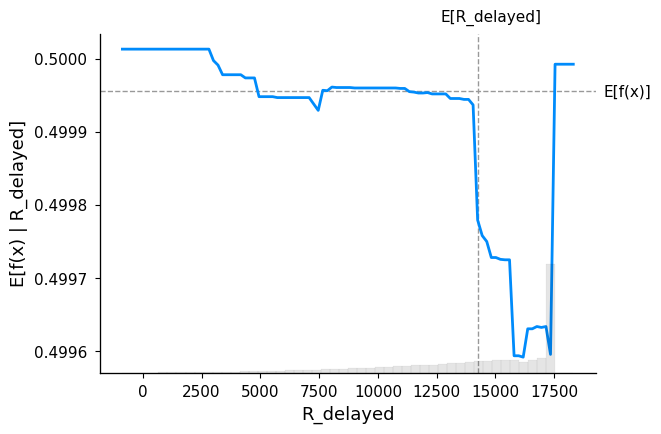

In [21]:
shap.partial_dependence_plot(
    "delta_radius", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)
shap.partial_dependence_plot(
    "delta_time", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)
shap.partial_dependence_plot(
    "E_pro", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True,
    xmin=0, xmax=12
)
shap.partial_dependence_plot(
    "E_del", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True,
    xmin=0, xmax=4
)
shap.partial_dependence_plot(
    "R_prompt", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)
shap.partial_dependence_plot(
    "R_delayed", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True
)


In [22]:
shap.initjs()

shap.plots.force(shap_values)

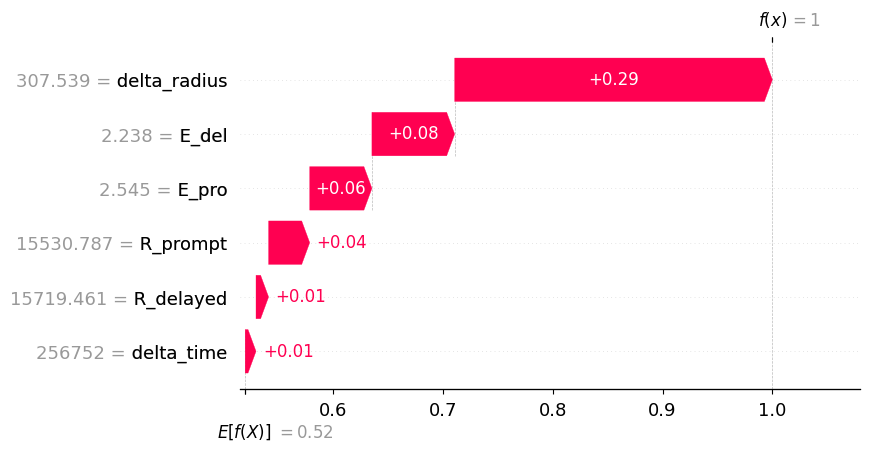

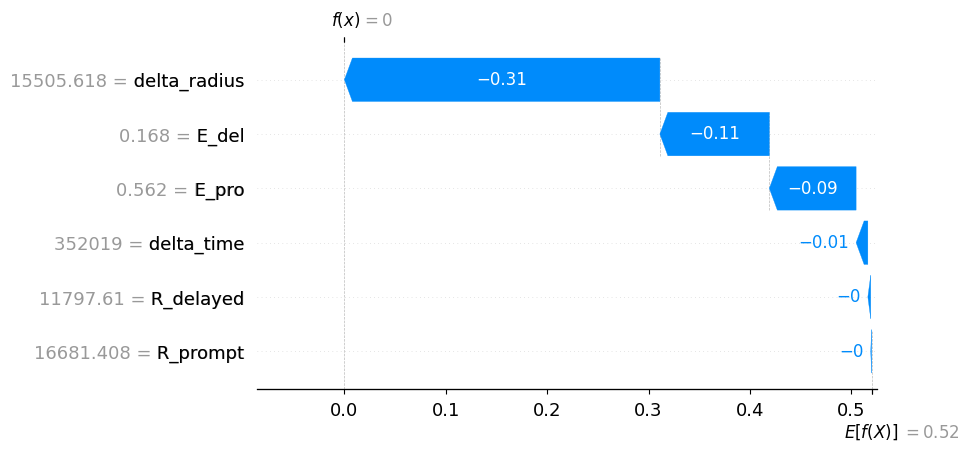

In [23]:
shap.plots.waterfall(shap_values[1])
shap.plots.waterfall(shap_values[0])

In [24]:
# shap.plots.scatter(shap_values[:,'delta_radius'], color=y_test[:2000])

In [25]:
# shap_values[:,0]

Pensieri finali:
- Dato che R_prompt e R_delayed non cotribuscono molto all'pprendimentodel modello, invece noi sappiamo che il BKG della radioattività produce segnali nelle parti più esterne del rivelatore. Inoltre segnalipiù esterni hanno energie esagerate, vedi plot (R_primpt, E_del). Dunque non è possibile cercare di combinare tecniche di Machien Learning e teciche manuali per distinguere i due tipi di segnale?

In [26]:
# #plot the precision-recall curve
# from sklearn.metrics import precision_recall_curve

# from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

# precision, recall, _ = precision_recall_curve(y_test, predictions)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp.plot()
# plt.show()


### Optimizing XGBoost

In [27]:
from sklearn.model_selection import GridSearchCV 

#Create values to search over
cv_params = {'max_depth': [3,4,6], #Maximum depth of a tree, increasing increase complxity
              'min_child_weight': [1,3,5],
                'learning_rate':[0.001, 0.01, 0.1, 0.3]} #Step size uset to prevent overfitting 


ind_params = {'n_estimators': 300, 'seed':1, 'colsample_bytree': 1, 
             'objective': 'binary:logistic'}

opt_XGBclassifier = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                            scoring = 'accuracy',
                            cv = 5,
                            n_jobs = -1,
                            verbose=3)

opt_XGBclassifier.fit(X_train, y_train)
opt_XGBclassifier.cv_results_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 4/5] END learning_rate=0.001, max_depth=3, min_child_weight=1;, score=0.999 total time= 7.0min
[CV 4/5] END learning_rate=0.001, max_depth=4, min_child_weight=3;, score=1.000 total time=10.0min
[CV 5/5] END learning_rate=0.001, max_depth=6, min_child_weight=3;, score=1.000 total time=15.2min
[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=5;, score=0.999 total time= 7.5min
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_weight=5;, score=1.000 total time= 9.9min
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=5;, score=1.000 total time=17.6min
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_weight=1;, score=1.000 total time= 9.2min
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=1;, score=1.000 total time=12.4min
[CV 1/5] END learning_rate=0.3, max_depth=3, min_child_weight=1;, score=1.000 total time= 6.0min
[CV 1/5] END learning_rate=0.3, max_depth=4, min_child_w

{'mean_fit_time': array([ 391.19100075,  395.91581683,  413.07684941,  490.91156912,
         540.25823874,  602.02628007,  768.35359755,  750.92948837,
         864.96851206,  394.55112834,  369.96983433,  415.51383295,
         566.4358758 ,  537.65013514,  584.7456027 , 1139.10380611,
        1135.96856713, 1056.20981536,  388.95621591,  400.50298729,
         377.75475602,  535.73605452,  490.5517127 ,  516.6705584 ,
         787.63848262,  756.43712292,  703.47843976,  389.41029081,
         387.13853869,  363.20497179,  509.42566009,  446.77430863,
         503.40127878,  582.38150902,  624.54852333,  555.46924644]),
 'std_fit_time': array([36.26783323, 34.71247038, 38.0200791 ,  5.23373401, 56.59572798,
        21.23655218, 27.34565087, 92.6435767 , 44.84500136, 38.98997255,
         6.6746449 , 39.97338063, 46.57950799, 29.14510699, 25.06494639,
        39.59378659, 25.68659173, 23.60529453, 22.67166164, 26.42572589,
        11.50728066, 33.41232897, 21.95105927, 31.45714373, 2

In [28]:
#Print scores
print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

#Find optimal parameters

print('The optimal parameters for the classifier are:')
print(opt_XGBclassifier.best_params_)

#Fit performance on the test set
XGBclassifier_final=opt_XGBclassifier.best_estimator_
y_pred_final=XGBclassifier_final.predict(X_test)
print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

The optimal score on training set is 1.000
The optimal parameters for the classifier are:
{'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1}
Model Accuray with optimal parameters: 100.00%
The  AUC score is 1.00


### Selezione BDT sul dataset di sola radioattività

In [29]:
all_feature = pd.read_csv("../../../../mnt/fcufino/all_features.csv")

In [30]:
X_rad_df = all_feature[(all_feature["Label"] == 0) & (all_feature["Source"] == 0)]
X_rad = X_rad_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_rad_pred = model.predict(X_rad)

In [31]:
print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

TP = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
TN = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
FN = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
FP = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

17 su 993457
Efficiency:  99.99828880364223
Purity:  100.0


### Selezione BDT sul dataset di soli veri IBD

In [32]:
X_true_IBD_df = all_feature[(all_feature["Label"] == 1) & (all_feature["Source"] == 1)]
X_true_IBD = X_true_IBD_df.drop(['Label', 'Source'], axis=1)

#Now predict y using model XGBoost thath has been trained
y_true_IBD_pred = model.predict(X_true_IBD)


In [33]:
print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

Venongono selezionati come IBD  1468350 Su un tot di 1468385
Efficiency:  99.99761642893384
Purity:  100.0


## PyTorch Neural Network

In [34]:
type(X_train[1:1+4].values)

numpy.ndarray

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# cuda, se disponibile
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definire il DataSet personalizzato
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Creare i set di dati personalizzati
train_dataset = CustomDataset(torch.from_numpy(X_train.values).float(), torch.from_numpy(y_train.values).long())
test_dataset = CustomDataset(torch.from_numpy(X_test.values).float(), torch.from_numpy(y_test.values).long())

# Creare i DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definire la rete neurale
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)  # num features from X_train
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, len(y_train.unique()))  # num classes from y_train

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Istanziare la rete e spostarla su cuda  
net = Net().to(device)

# Definire la loss function e l'optimizer
criterion = nn.CrossEntropyLoss()  # Usando la CrossEntropy come funzione di perdita per la classificazione
optimizer = optim.Adam(net.parameters())

# Addestrare la rete
for epoch in range(100):  # 100 epoche
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

print('Finished Training')

# Calcolare l'accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs) 
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))


[CV 4/5] END learning_rate=0.001, max_depth=3, min_child_weight=3;, score=0.999 total time= 6.0min
[CV 3/5] END learning_rate=0.001, max_depth=4, min_child_weight=1;, score=1.000 total time= 8.2min
[CV 2/5] END learning_rate=0.001, max_depth=6, min_child_weight=1;, score=1.000 total time=12.8min
[CV 5/5] END learning_rate=0.01, max_depth=3, min_child_weight=1;, score=1.000 total time= 7.6min
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_weight=3;, score=1.000 total time= 9.5min
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=3;, score=1.000 total time=18.6min
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=3;, score=1.000 total time= 6.6min
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_weight=3;, score=1.000 total time= 8.0min
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=3;, score=1.000 total time=12.9min
[CV 2/5] END learning_rate=0.3, max_depth=3, min_child_weight=3;, score=1.000 total time= 6.9min
[CV 3/5] END learning

In [36]:
# #Save the model
# PATH = './pythorch_net.pth'
# torch.save(net.state_dict(), PATH)

# #Load the model
# net = Net(input_size, hidden_size, num_classes)
# net.load_state_dict(torch.load(PATH))

## SVM kernel rbf

In [37]:
from sklearn import svm
# Definisci il modello SVM
svm_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')

y_train = y_train.ravel()
# Addestra il modello sui dati di train
svm_rbf.fit(X_train, y_train)

SVC(C=1)

In [38]:
accuracy = svm_rbf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.996295305637285
